# Feature matching using CV2 and Python 7_18_2020


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
'''
Feature Matching: using Brute force ORB
Now we start doing real life applicable stuff using CV2
Template matching != Feature matching s.t., Feature matching does not require exact match
Base image != secondary image
Three methods(3): 
1. Brute force matching with ORB descriptors
2. Brute force matching with SIFT descriptors and RATIO test
3. FLANN based matcher

'''



'\nFeature Matching: \nNow we start doing real life applicable stuff using CV2\nTemplate matching != Feature matching s.t., Feature matching does not require exact match\nBase image != secondary image\nThree methods(3): \n1. Brute force matching with ORB descriptors\n2. Brute force matching with SIFT descriptors and RATIO test\n3. FLANN based matcher\n\n'

In [9]:
def display_image(img, cmap='gray'):
    fig = plt.figure(figsize =(12,10))
    ax = fig.add_subplot(111)
    ax = plt.imshow(img, cmap='gray')
    

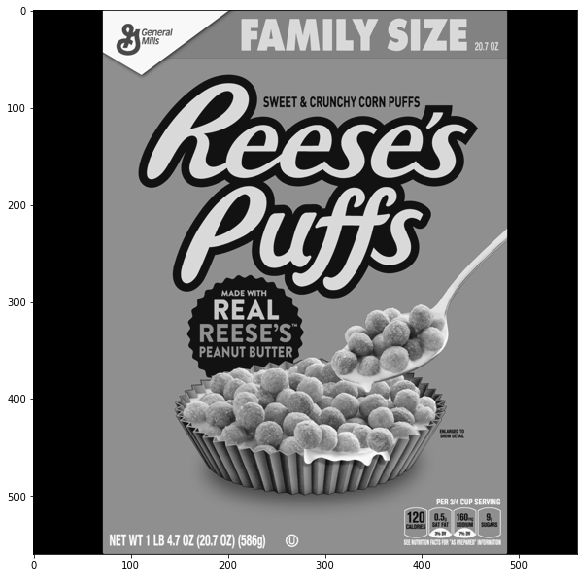

In [11]:
reeses = cv2.imread('./original/Computer-Vision-with-Python/DATA/reeses_puffs.png',0)
display_image(reeses)

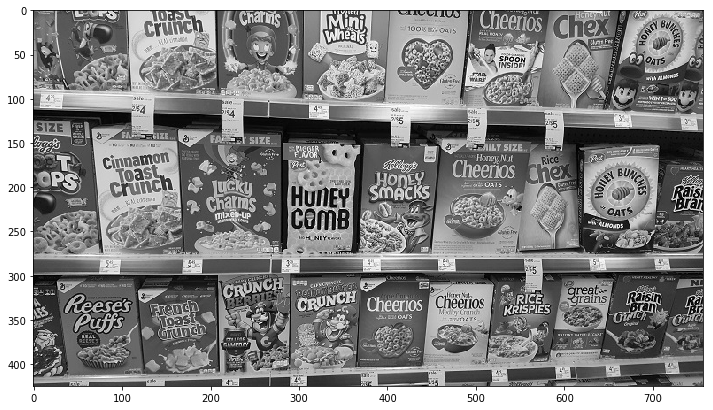

In [12]:

cereals = cv2.imread('./original/Computer-Vision-with-Python/DATA/many_cereals.jpg',0)
display_image(cereals)

In [13]:
'''
Reese's Puff is at he bottom left, it is not an exact match...
For example,the one we are looking for says 'Family size at the top'. 
The one in the many does not. 

First step is to create a detector
creating a 'detector object' called 'orb', which will detect against the 1. image we are looking for and 2. target image
'''

orb = cv2.ORB_create()

In [14]:
# Running detector against the 2 images:  reeses and cereals

kp1, des1 = orb.detectAndCompute(reeses, None)   #None is for the mask parameter
kp2, des2 = orb.detectAndCompute(cereals, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck= True)

In [15]:
matches = bf.match(des1,des2)
matches   # these matches are series of matching objects....at this juncture


[<DMatch 057C3EF0>,
 <DMatch 02CABB48>,
 <DMatch 02CABBF0>,
 <DMatch 08FC3A10>,
 <DMatch 08FC3A70>,
 <DMatch 08FC3B18>,
 <DMatch 08FC3AB8>,
 <DMatch 08FC39C8>,
 <DMatch 08FC3980>,
 <DMatch 08FC35D8>,
 <DMatch 08FC34A0>,
 <DMatch 08FC3B30>,
 <DMatch 08FC38A8>,
 <DMatch 08FC3890>,
 <DMatch 08FC3998>,
 <DMatch 08FC3A40>,
 <DMatch 08FC3AD0>,
 <DMatch 08FC3AE8>,
 <DMatch 08FC39B0>,
 <DMatch 08FC3B00>,
 <DMatch 08FC3818>,
 <DMatch 08FC3290>,
 <DMatch 08FC3380>,
 <DMatch 08FC39E0>,
 <DMatch 08FC3830>,
 <DMatch 08FC31E8>,
 <DMatch 08FC3608>,
 <DMatch 08FC3698>,
 <DMatch 08FC3680>,
 <DMatch 08FC37B8>,
 <DMatch 08FC36F8>,
 <DMatch 08FC37A0>,
 <DMatch 08FC3B48>,
 <DMatch 08FC3B78>,
 <DMatch 08FC3B90>,
 <DMatch 08FC3BA8>,
 <DMatch 08FC3BC0>,
 <DMatch 08FC3BD8>,
 <DMatch 08FC3848>,
 <DMatch 08FC3BF0>,
 <DMatch 08FC3158>,
 <DMatch 08FC3C08>,
 <DMatch 08FC3C20>,
 <DMatch 08FC3530>,
 <DMatch 08FC35F0>,
 <DMatch 08FC3C38>,
 <DMatch 08FC3C50>,
 <DMatch 08FC3C68>,
 <DMatch 08FC3728>,
 <DMatch 08FC3C80>,


In [16]:
single_match_distance = matches[0].distance
single_match_distance

56.0

In [24]:
# sorted(matches, key = <sort based on this key>)

matches = sorted(matches,key = lambda x:x.distance)   #this line of code will run thorugh the entire list of matches 
# and sort them based on distance
matches
single_match_distance = matches[0].distance
print(single_match_distance)
print(len(matches))    # there are 139 matches which is way too much so let's just look at first 25 of them

42.0
139


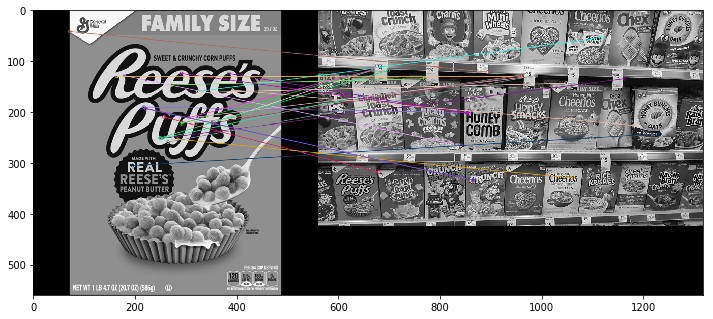

In [25]:
# Draw matches will take 2 images based on points, and run though the list and identify them....

reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags = 2)
display_image(reeses_matches)

# the performance is poor